In [6]:
import xarray as xr
import numpy as np
import os
import glob


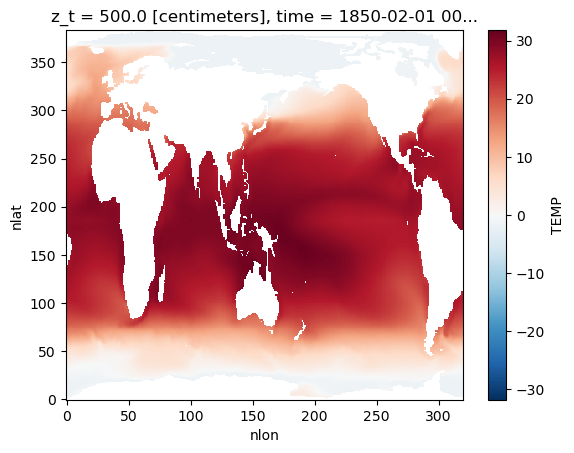

In [13]:
# Directory and file pattern
input_directory = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/temp/'
output_directory = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/ensemble_mean/'
file_pattern = os.path.join(input_directory, 'temp_*.nc')

# List all files matching the pattern
files = glob.glob(file_pattern)

# Select the first three files for testing
test_files = files[:3]

# Function to open a dataset, select the desired variable and subset the first three time steps
def open_dataset(file):
    ds = xr.open_dataset(file)
    return ds['TEMP'].isel(time=slice(0, 3))

# Load the test datasets and concatenate them along a new 'ensemble' dimension
datasets = [open_dataset(file) for file in test_files]
combined = xr.concat(datasets, dim='ensemble')

# Compute the ensemble mean, ignoring missing values (NaNs)
ensemble_mean = combined.mean(dim='ensemble', skipna=True)

# Save the ensemble mean to a NetCDF file
output_file = os.path.join(output_directory, 'temp_ensemble_mean.nc')
ensemble_mean.to_netcdf(output_file)

In [20]:
import xarray as xr
import numpy as np
import os
import glob

# Define the variables you want to process
variables = ['temp', 'salt', 'hmxl', 'shf']

# Input and output directory
input_base_directory = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/'
output_directory = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/ensemble_mean/'

# Create the output directory if it does not exist
os.makedirs(output_directory, exist_ok=True)

# Process each variable
for var in variables:
    # Construct the file pattern based on the variable name
    input_directory = os.path.join(input_base_directory, var)
    file_pattern = os.path.join(input_directory, f'{var}_*.nc')
    
    # List all files matching the pattern
    files = glob.glob(file_pattern)
    
    # Select the first three files for testing
    test_files = files[:3]
    
    # Function to open a dataset, select the desired variable, and subset the first three time steps
    def open_dataset(file):
        ds = xr.open_dataset(file)
        return ds[var.upper()].isel(time=slice(0, 3))

    # Load the test datasets and concatenate them along a new 'ensemble' dimension
    datasets = [open_dataset(file) for file in test_files]
    combined = xr.concat(datasets, dim='ensemble')
    
    # Compute the ensemble mean, ignoring missing values (NaNs)
    ensemble_mean = combined.mean(dim='ensemble', skipna=True)
    
    # Save the ensemble mean to a NetCDF file
    output_file = os.path.join(output_directory, f'ensemble_mean_{var}.nc')
    ensemble_mean.to_netcdf(output_file)

    print(f"Ensemble mean for {var} saved")

Ensemble mean for temp saved to: /Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/ensemble_mean/ensemble_mean_temp.nc
Ensemble mean for salt saved to: /Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/ensemble_mean/ensemble_mean_salt.nc
Ensemble mean for hmxl saved to: /Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/ensemble_mean/ensemble_mean_hmxl.nc
Ensemble mean for shf saved to: /Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/ensemble_mean/ensemble_mean_shf.nc


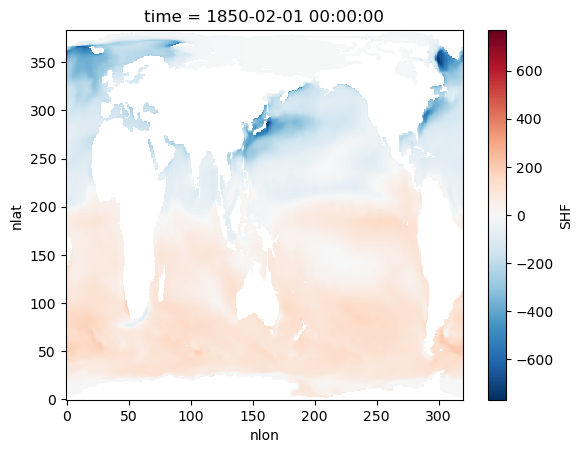

In [21]:
ensemble_mean.isel(time=0).plot()

In [14]:
import os
output_directory = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/ensemble_mean/'
os.makedirs(output_directory, exist_ok=True)